# TF-IDF Model Training

In [209]:
import pandas as pd

In [210]:
# Load data (LIAR Dataset)
data_df_train_true_raw = pd.read_csv('../../dataset/LIAR/data/train_true.csv', sep=',', header=0)
data_df_test_true_raw = pd.read_csv('../../dataset/LIAR/data/test_true.csv', sep=',', header=0)
data_df_valid_true_raw = pd.read_csv('../../dataset/LIAR/data/valid_true.csv', sep=',', header=0)

data_df_train_false_raw = pd.read_csv('../../dataset/LIAR/data/train_false.csv', sep=',', header=0)
data_df_test_false_raw = pd.read_csv('../../dataset/LIAR/data/test_false.csv', sep=',', header=0)
data_df_valid_false_raw = pd.read_csv('../../dataset/LIAR/data/valid_false.csv', sep=',', header=0)

data_df_train_raw = pd.read_csv('../../dataset/LIAR/data/train.csv', sep=',', header=0)
data_df_test_raw = pd.read_csv('../../dataset/LIAR/data/test.csv', sep=',', header=0)
data_df_valid_raw = pd.read_csv('../../dataset/LIAR/data/valid.csv', sep=',', header=0)


In [211]:
# Merge all data
master_df = pd.concat([data_df_train_raw, data_df_test_raw, data_df_valid_raw], ignore_index=True)
print(master_df.shape)
master_df.head(5)

(12791, 15)


,id,label,statement,subject,speaker,job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,statement_processed
0,2635.json,False,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,say Annies List political group support trimes...
1,10540.json,True,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,decline coal start start natural gas take star...
2,324.json,True,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,Hillary Clinton agree John McCain vote George ...
3,1123.json,False,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,health care reform legislation likely mandate ...
4,9028.json,True,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,economic turnaround start end term


In [212]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.pipeline import Pipeline

In [213]:
from sklearn.model_selection import train_test_split

In [214]:
# X_train = data_df_train_raw['statement_processed']
# y_train = data_df_train_raw['label']
# X_test = data_df_test_raw['statement_processed']
# y_test = data_df_test_raw['label']

# vectorizer = TfidfVectorizer() 
# train_vectors = vectorizer.fit_transform(X_train)
# test_vectors = vectorizer.transform(X_test)

X = master_df['statement_processed']
y = master_df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

(X_train.shape, y_train.shape)

((10232,), (10232,))

## Random Forest

#### Training

In [217]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [219]:
pipeline_rf = Pipeline(
    [
        ("vect", TfidfVectorizer(use_idf=True)),
        ("clf", RandomForestClassifier(n_jobs=-2)),
    ]
)

parameters_rf = {
    "clf__n_estimators": [50, 100, 200, 500],       # default=100
}

In [220]:
clf_rf = GridSearchCV(pipeline_rf, parameters_rf)
result_rf = clf_rf.fit(X_train, y_train)

63251.38s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
63251.59s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
63251.79s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
63251.99s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
63252.19s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
63252.40s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
63252.60s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
63252.80s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
63253.00s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
63253.21s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
63253.42s - pydevd: Sending message rela

In [221]:
result_rf

GridSearchCV(estimator=Pipeline(steps=[('vect', TfidfVectorizer()),
                                       ('clf',
                                        RandomForestClassifier(n_jobs=-2))]),
             param_grid={'clf__n_estimators': [50, 100, 200, 500]})

In [222]:
# save model
from joblib import dump
dump(result_rf, 'clf_rf.joblib')

['clf_rf.joblib']

#### Evaluation

In [223]:
# laod model
from joblib import load
clf_rf = load('clf_rf.joblib') 

In [224]:
y_pred = clf_rf.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.60      0.43      0.50      1157
        True       0.62      0.76      0.68      1402

    accuracy                           0.61      2559
   macro avg       0.61      0.59      0.59      2559
weighted avg       0.61      0.61      0.60      2559



In [225]:
pd.DataFrame({"X_test": X_test, "y_test":y_test,"y_pred": y_pred})

,X_test,y_test,y_pred
11250,instance people health care cost mortgage cost...,False,True
2711,say subject 60 book,True,False
7660,currently delay month processing dna evidence ...,True,True
2359,Gov. Rick Scott try waiver federal health care...,True,False
3122,Bernie Sanderss plan raise taxis 90 percent,False,False
...,...,...,...
6284,say state Texas permit juror ask question witn...,True,True
562,week governor Tim Kaine propose nearly $ 4 bil...,True,True
9651,assault Wisconsin law enforcement officer 224 ...,True,True
3354,odd fact odd draft 2 overall pick earn 1 pick ...,True,True


## Support Vector Machine Classifier

In [226]:
from sklearn.svm import SVC

In [227]:
pipeline_svc = Pipeline(
    [
        ("vect", TfidfVectorizer(use_idf=True)),
        ("clf", SVC()),
    ]
)

parameters_svc = {
    "clf__C": [0.1, 1, 10, 100],  # default=1.0
    "clf__kernel": ["linear", "poly", "rbf", "sigmoid"],  # default="rbf"
    "clf__degree": [3, 4, 5],  # default=3
}


In [228]:
clf_svc = GridSearchCV(pipeline_svc, parameters_svc, n_jobs=-2)
result_svc = clf_svc.fit(X_train, y_train)

print(result_svc.best_params_)

{'clf__C': 1, 'clf__degree': 3, 'clf__kernel': 'rbf'}


In [229]:
# save model
from joblib import dump
dump(result_svc, 'clf_svc.joblib')

['clf_svc.joblib']

In [230]:
# laod model
from joblib import load
clf_svc = load('clf_svc.joblib') 

In [231]:
y_pred = clf_svc.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.60      0.40      0.48      1157
        True       0.61      0.78      0.69      1402

    accuracy                           0.61      2559
   macro avg       0.61      0.59      0.58      2559
weighted avg       0.61      0.61      0.59      2559



## Gaussian Naive Bayes

In [232]:
from sklearn.naive_bayes import BernoulliNB


In [233]:
pipeline_nb = Pipeline(
    [
        ("vect", TfidfVectorizer(use_idf=True)),
        ("clf", BernoulliNB()),
    ]
)


In [234]:
result_nb = pipeline_nb.fit(X_train, y_train)

print(result_nb.get_params())

{'memory': None, 'steps': [('vect', TfidfVectorizer()), ('clf', BernoulliNB())], 'verbose': False, 'vect': TfidfVectorizer(), 'clf': BernoulliNB(), 'vect__analyzer': 'word', 'vect__binary': False, 'vect__decode_error': 'strict', 'vect__dtype': <class 'numpy.float64'>, 'vect__encoding': 'utf-8', 'vect__input': 'content', 'vect__lowercase': True, 'vect__max_df': 1.0, 'vect__max_features': None, 'vect__min_df': 1, 'vect__ngram_range': (1, 1), 'vect__norm': 'l2', 'vect__preprocessor': None, 'vect__smooth_idf': True, 'vect__stop_words': None, 'vect__strip_accents': None, 'vect__sublinear_tf': False, 'vect__token_pattern': '(?u)\\b\\w\\w+\\b', 'vect__tokenizer': None, 'vect__use_idf': True, 'vect__vocabulary': None, 'clf__alpha': 1.0, 'clf__binarize': 0.0, 'clf__class_prior': None, 'clf__fit_prior': True, 'clf__force_alpha': 'warn'}


In [235]:
# save model
from joblib import dump
dump(result_nb, 'clf_nb.joblib')

['clf_nb.joblib']

In [236]:
from joblib import load
clf_nb = load('clf_nb.joblib')

In [237]:
y_pred = clf_nb.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.57      0.44      0.50      1157
        True       0.61      0.73      0.67      1402

    accuracy                           0.60      2559
   macro avg       0.59      0.59      0.58      2559
weighted avg       0.59      0.60      0.59      2559



## Learning Curve

In [238]:
from joblib import load
clf_rf = load('clf_rf.joblib') 
clf_svc = load('clf_svc.joblib') 
clf_nb = load('clf_nb.joblib') 

In [239]:
# Print classification report of each model
print("Random Forest")
print(classification_report(y_test, clf_rf.predict(X_test)))
print("SVM")
print(classification_report(y_test, clf_svc.predict(X_test)))
print("Naive Bayes")
print(classification_report(y_test, clf_nb.predict(X_test)))

Random Forest
              precision    recall  f1-score   support

       False       0.60      0.43      0.50      1157
        True       0.62      0.76      0.68      1402

    accuracy                           0.61      2559
   macro avg       0.61      0.59      0.59      2559
weighted avg       0.61      0.61      0.60      2559

SVM
              precision    recall  f1-score   support

       False       0.60      0.40      0.48      1157
        True       0.61      0.78      0.69      1402

    accuracy                           0.61      2559
   macro avg       0.61      0.59      0.58      2559
weighted avg       0.61      0.61      0.59      2559

Naive Bayes
              precision    recall  f1-score   support

       False       0.57      0.44      0.50      1157
        True       0.61      0.73      0.67      1402

    accuracy                           0.60      2559
   macro avg       0.59      0.59      0.58      2559
weighted avg       0.59      0.60      0.59 

In [240]:
estimators = {
    "Random Forest": clf_rf.estimator,
    "SVM": clf_svc.estimator,
    "Navie Bayes": clf_nb,
}

/home/kooler/dev/sw/sns-fake-content/model/env_model/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
63813.89s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
63826.12s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
63830.45s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


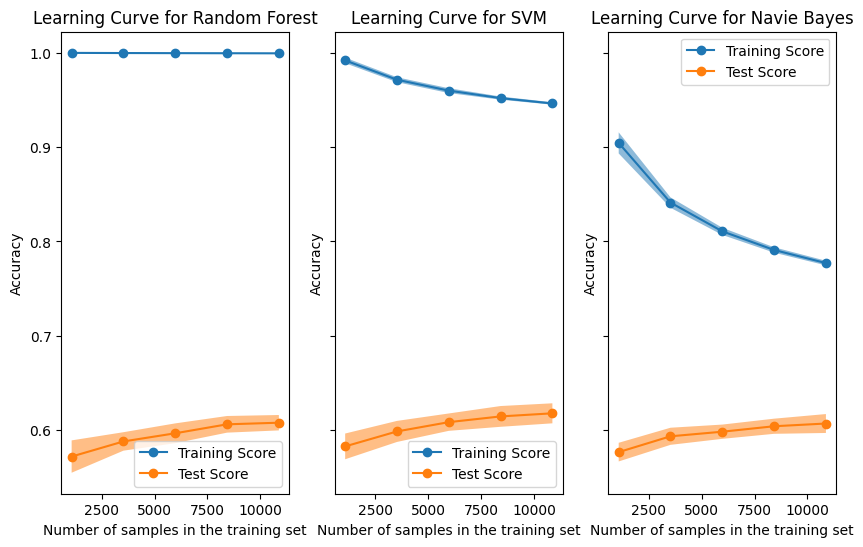

In [248]:
from sklearn.model_selection import learning_curve, LearningCurveDisplay, ShuffleSplit
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=len(estimators), figsize=(10, 6), sharey=True)


common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=25, test_size=0.15),
    "score_type": "both",
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
    "n_jobs": -2,
}

for ax_idx, estimator_key in enumerate(estimators.keys()):

    LearningCurveDisplay.from_estimator(
        estimators[estimator_key], **common_params, ax=ax[ax_idx]
    )
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[: len(estimators)], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator_key}")

fig.savefig("learning_curve.png", dpi=300, bbox_inches="tight")


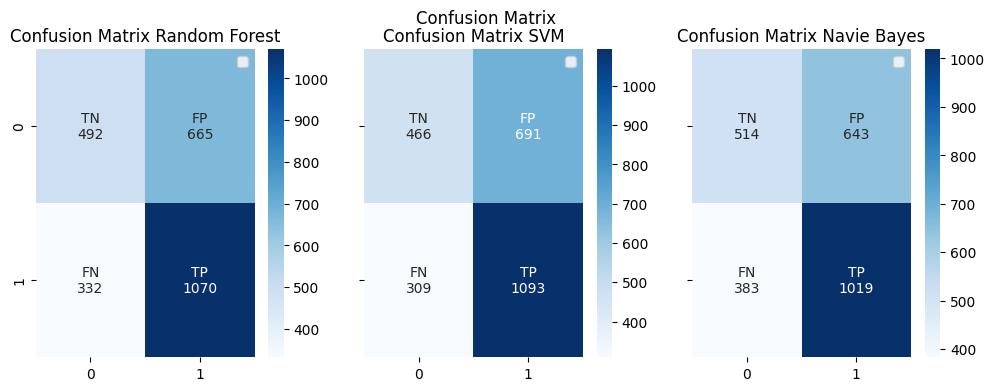

In [297]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

fig, ax = plt.subplots(nrows=1, ncols=len(estimators), figsize=(12, 4), sharey=True)
fig.suptitle("Confusion Matrix")
group_names = ["TN", "FP", "FN", "TP"]

models = [clf_rf, clf_svc, clf_nb]
models_name = ["Random Forest", "SVM", "Navie Bayes"]

# Plot Confusion matrix
for idx, model in enumerate(models):
    ax[idx].legend(handles[: len(estimators)], ["Training Score", "Test Score"])
    ax[idx].set_title(f"Confusion Matrix {models_name[idx]}")
    
    cnf_matrix = confusion_matrix(y_test, model.predict(X_test))
    group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, group_counts)]
    labels = np.asarray(labels).reshape(2, 2)

    sns.heatmap(cnf_matrix, ax=ax[idx], annot=labels, fmt="", cmap="Blues")

fig.savefig("confusion_matrix.png", dpi=300, bbox_inches="tight")